<a href="https://colab.research.google.com/github/ViniciusCapellari/Teste-001/blob/main/projeto_mobilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd # importa a biblioteca necessária

In [15]:
from google.colab import files # importa o arquivo CSV escolhido # mobilidade urbana

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving Arquivo CSV original (1).xlsx to Arquivo CSV original (1) (2).xlsx
User uploaded file "Arquivo CSV original (1) (2).xlsx" with length 17473 bytes


In [19]:
mapa_incomodos = {     # define o dicionário de mapeamento
    "Tempo perdido": 1,
    "Estresse": 2,
    "Custo com combustível": 3,
    "Insegurança": 4,
    "Poluição": 5,
    "Outros": 6
}

In [20]:
def transformar_incomodos(texto):  # cria a função que transforma texto em números
    if pd.isna(texto):
        return 0

    itens = [i.strip() for i in texto.split(";")]
    valores = []

    for item in itens:
        valores.append(mapa_incomodos.get(item, 6))

    return sum(valores)

In [21]:
df = pd.read_excel('Arquivo CSV original (1) (1).xlsx') # aplica a função à coluna do dataset

coluna = "Quais fatores mais te incomodam no trânsito? (escolha até 3)"
df["incomodos_numericos"] = df[coluna].apply(transformar_incomodos)
df.head()

,Carimbo de data/hora,Nome de usuário,Qual a sua faixa etária?,Qual seu gênero?,Qual é sua ocupação principal?,Com que frequência você se desloca durante a semana?,"Para entender melhor como diferentes pessoas se deslocam pela cidade, gostaríamos de saber sua faixa de renda mensal. Essa informação é fundamental para analisarmos as diferenças nos meios de transporte utilizados.",Com que frequência você enfrenta congestionamentos ou trânsito parado nos seus deslocamentos diários?,Qual meio de transporte você mais utiliza?,"Você costuma fazer trajetos semelhantes com outras pessoas (vizinhos, colegas de trabalho, amigos)?",...,Eu me cadastraria em um aplicativo local de carona compartilhada se ele estivesse disponível na minha cidade.,"Para garantir a qualidade das respostas, marque a opção “Concordo” nesta pergunta.",O que mais te impediria de usar um app de carona compartilhada? (escolha até 2),Quais recursos fariam você confiar mais e realmente usar um app de carona compartilhada? (escolha até 3),Eu teria mais confiança em um app de carona se ele fosse administrado por uma instituição pública ou universidade local.,Eu aceitaria pagar por caronas se o valor fosse igual ou menor que o do transporte público?,"Na sua opinião, quais são os principais motivos para os congestionamentos na sua cidade? (escolha até 3)","Na sua opinião, qual seria a melhor forma de reduzir os congestionamentos nas áreas mais afetadas?","Se eu fosse motorista, estaria disposto(a) a oferecer carona em troca de uma ajuda de custo que cobrisse parte do combustível, sabendo que isso ajudaria a melhorar o trânsito da minha cidade.",incomodos_numericos
0,2025/05/23 3:22:47 PM GMT-3,arielalmeidasenac@gmail.com,18 a 24,Masculino,Trabalhador CLT,De 3 a 4 vezes por semana,De 1 a 3 salários mínimos,Às vezes,Carro (próprio),Às vezes,...,5,Concordo totalmente,Falta de confiança em estranhos,Sistema de verificação de identidade dos usuár...,5,5,Número excessivo de carros particulares;Falta ...,Melhoria das vias para reduzir engarrafamentos,4,10
1,2025/05/23 4:15:23 PM GMT-3,pablovargas56@gmail.com,25 a 34,Masculino,Trabalhador CLT,Todos os dias,Acima de 5 salários mínimos,Às vezes,"Aplicativos (Uber, 99, etc.)",Sim,...,5,Concordo,Horários inflexíveis,Sistema de verificação de identidade dos usuár...,5,5,Falta de planejamento urbano,Promoção de alternativas como carona compartil...,5,1
2,2025/05/23 5:53:08 PM GMT-3,andrielimonteiro2@gmail.com,25 a 34,Feminino,Trabalhador CLT,Todos os dias,De 1 a 3 salários mínimos,Frequentemente,Carro (próprio),Não,...,5,Concordo,Falta de confiança em estranhos,Sistema de verificação de identidade dos usuários,3,5,Número excessivo de carros particulares,Melhoria das vias para reduzir engarrafamentos,3,2
3,2025/05/23 6:36:23 PM GMT-3,katyavitoria8@gmail.com,18 a 24,Feminino,Trabalhador CLT,Todos os dias,Prefiro não responder,Sempre,Carro (carona),Sim,...,5,Concordo totalmente,"Nada, eu usaria tranquilamente",Sistema de verificação de identidade dos usuár...,5,5,Número excessivo de carros particulares;Falta ...,Aumento da oferta de transporte público,5,1
4,2025/05/23 6:37:59 PM GMT-3,arthurdahmer959@gmail.com,25 a 34,Masculino,Trabalhador CLT,Todos os dias,Prefiro não responder,Às vezes,Carro (próprio),Sim,...,4,Concordo,Falta de confiança em estranhos;Horários infle...,Sistema de verificação de identidade dos usuár...,2,4,Número excessivo de carros particulares;Falta ...,Melhoria das vias para reduzir engarrafamentos,4,7


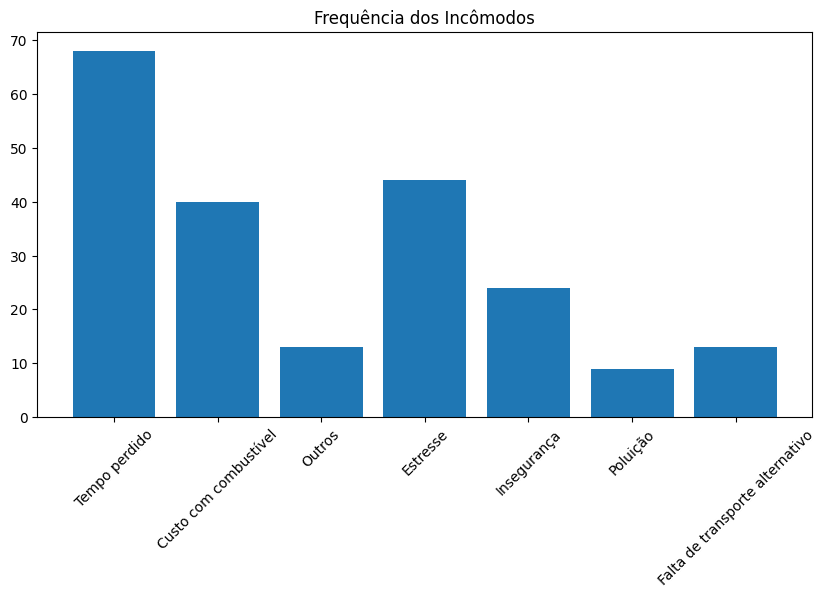

In [23]:
from collections import Counter # frequência dos incômodos citados
import matplotlib.pyplot as plt

todos = []

# percorre cada linha não vazia da coluna
for linha in df[coluna].dropna():
    itens = [i.strip() for i in linha.split(";")]
    todos.extend(itens)

# cria o contador corretamente
contagem = Counter(todos)

plt.figure(figsize=(10,5))
plt.bar(contagem.keys(), contagem.values())
plt.xticks(rotation=45)
plt.title("Frequência dos Incômodos")
plt.show()